In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import tqdm
from scipy import sparse
from networkx import bipartite
import matplotlib.pyplot as plt

from bmg import KRON, mean_squared_error
from bmg import bmg_recon_all, graph_recon_bmg
from bmg import compute_clustering_coefficient_for_one_recon_graph, compute_closeness_centrality_for_one_recon_graph, compute_degree_for_one_recon_graph

%load_ext autoreload
%autoreload 2

In [2]:
'''generate synthetic graph'''

N_A = 400
N_B = 600
K_sim = 3

l_A_sim = [0.7, 0.3]
l_B_sim = [0.4, 0.6]
p_sim = [[0.3, 0.5],
     [0.8, 0.6]]

M_A = len(l_A_sim)
M_B = len(l_B_sim)

l_A_sim_k = KRON(l_A_sim, K_sim)
l_B_sim_k = KRON(l_B_sim, K_sim)
p_sim_k = KRON(p_sim, K_sim)

type_a = np.random.choice(pow(M_A,K_sim), N_A, p=l_A_sim_k)
type_b = np.random.choice(pow(M_B,K_sim), N_B, p=l_B_sim_k)
rnd = np.random.rand(N_A,N_B)

R = [[rnd[u][v]<p_sim_k[type_a[u]][type_b[v]] for v in range(N_B)] for u in range(N_A)]
R = np.array(R,dtype=float)


# create nx graph

node_a, node_b = ['A'+ str(i) for i in range(N_A)], ['B'+ str(j) for j in range(N_B)]
name_a, name_b = 'A', 'B'

edgelist = []
for u in range(N_A):
    for v in range(N_B):
        if R[u][v]:
            edgelist.append((node_a[u],node_b[v]))

B_ori = nx.Graph()
B_ori.add_nodes_from(node_a,bipartite=0)
B_ori.add_nodes_from(node_b,bipartite=1)
B_ori.add_edges_from(edgelist)


In [3]:
'''model estimation'''

# EM settings
E_iter = 10
M_iter = 40
EM_iter = 500
ss = 1e-8 # step length
early_stop_M = True
M_stopping = 0.0001
EM_stopping = 0.1
    
# Initialization
l_A = np.array([0.45,0.55])
l_B = np.array([0.55,0.45])
M_A, M_B = len(l_A), len(l_B)
p = np.array([[0.55,0.45],[0.45,0.65]])
K = K_sim

# start estimation
l_A, l_B, p, tau_A_K, tau_B_K, llh_all, l_A_all, l_B_all, p_all, llh_p_all, tau_A_K_all, tau_B_K_all\
    = bmg_recon_all(R, l_A, l_B, p, K, ss=ss, EM_iter=EM_iter, \
                E_iter=E_iter, M_iter=M_iter, EM_stopping=EM_stopping, M_stopping=M_stopping, \
                early_stop_M=early_stop_M)


initialization: l_A=[0.45 0.55], l_B=[0.55 0.45], p=[[0.55 0.45]
 [0.45 0.65]]
EM iter=0: l_A=[0.37530423193241214, 0.6246957680675871], l_B=[0.2057268001981509, 0.7942731998018483], p=[[0.55072315 0.4604458 ]
 [0.44830294 0.61440463]], llh=-97949.75707811608
EM iter=1: l_A=[0.3752263042290167, 0.624773695770984], l_B=[0.19349726092857272, 0.806502739071426], p=[[0.55141333 0.47076903]
 [0.44695658 0.58582766]], llh=-95947.3265748939
EM iter=2: l_A=[0.37546482660871283, 0.6245351733912888], l_B=[0.16047819696116414, 0.8395218030388372], p=[[0.55197983 0.48095321]
 [0.44640651 0.56130535]], llh=-94470.43924058219
EM iter=3: l_A=[0.3768691567683647, 0.623130843231634], l_B=[0.13783747094990884, 0.8621625290500907], p=[[0.55246059 0.49075837]
 [0.44628985 0.54069487]], llh=-93384.15569177747
EM iter=4: l_A=[0.3805984377717057, 0.6194015622282938], l_B=[0.13879436788243898, 0.8612056321175623], p=[[0.55294768 0.49987438]
 [0.44624298 0.5240071 ]], llh=-92469.85744084527
EM iter=5: l_A=[0.3

EM iter=45: l_A=[0.3617624420735071, 0.638237557926492], l_B=[0.5198948337081281, 0.48010516629187344], p=[[0.62525958 0.55195451]
 [0.35316608 0.52946807]], llh=-87850.67149739695
EM iter=46: l_A=[0.3592006020211216, 0.6407993979788813], l_B=[0.5174755084145555, 0.4825244915854465], p=[[0.62683692 0.55256156]
 [0.35200351 0.52990785]], llh=-87840.5203138145
EM iter=47: l_A=[0.35624563608286464, 0.6437543639171344], l_B=[0.5149320888405233, 0.4850679111594764], p=[[0.62844407 0.55318523]
 [0.35089716 0.53033847]], llh=-87830.38114147903
EM iter=48: l_A=[0.35296766753834513, 0.6470323324616539], l_B=[0.5121599455846119, 0.48784005441538736], p=[[0.63009632 0.55383624]
 [0.34983995 0.53075672]], llh=-87819.51182024078
EM iter=49: l_A=[0.35067328210816323, 0.6493267178918366], l_B=[0.510084430386495, 0.48991556961350335], p=[[0.63175242 0.55448858]
 [0.34882386 0.53115863]], llh=-87809.76675843175
EM iter=50: l_A=[0.348874769666477, 0.6511252303335229], l_B=[0.5082910803629835, 0.49170891

EM iter=91: l_A=[0.3064162113694265, 0.6935837886305732], l_B=[0.47898638791709186, 0.5210136120829075], p=[[0.69587127 0.57766826]
 [0.3281702  0.53386942]], llh=-87523.39391187705
EM iter=92: l_A=[0.3058830374669402, 0.69411696253306], l_B=[0.4786942348020191, 0.5213057651979794], p=[[0.69718636 0.57810586]
 [0.32797822 0.53363328]], llh=-87518.47103319466
EM iter=93: l_A=[0.3057405800566178, 0.6942594199433811], l_B=[0.4784091168134274, 0.521590883186571], p=[[0.69847847 0.57852898]
 [0.32778676 0.53338789]], llh=-87514.20967985532
EM iter=94: l_A=[0.30563968537973196, 0.6943603146202678], l_B=[0.4781068128536121, 0.521893187146388], p=[[0.69974632 0.57893705]
 [0.32759517 0.53313367]], llh=-87509.70662799098
EM iter=95: l_A=[0.3055500038492624, 0.6944499961507374], l_B=[0.47778467861277507, 0.5222153213872236], p=[[0.70099035 0.57933057]
 [0.32740357 0.53287154]], llh=-87505.33112659973
EM iter=96: l_A=[0.30546879106212443, 0.6945312089378735], l_B=[0.47745046493184196, 0.522549535

EM iter=137: l_A=[0.3042446722616693, 0.6957553277383286], l_B=[0.4580304176057359, 0.5419695823942638], p=[[0.73825136 0.58798629]
 [0.32045043 0.5212636 ]], llh=-87407.82718952623
EM iter=138: l_A=[0.30425196372094016, 0.6957480362790595], l_B=[0.457636036138397, 0.5423639638616033], p=[[0.73888487 0.58808223]
 [0.32032056 0.52104152]], llh=-87406.74328559286
EM iter=139: l_A=[0.304259386196274, 0.6957406138037252], l_B=[0.45724770964348915, 0.5427522903565122], p=[[0.73950938 0.58817536]
 [0.32019262 0.52082328]], llh=-87405.69379697356
EM iter=140: l_A=[0.304266919192783, 0.6957330808072146], l_B=[0.4568653736583486, 0.5431346263416518], p=[[0.74012503 0.58826577]
 [0.3200666  0.52060883]], llh=-87404.67762710073
EM iter=141: l_A=[0.30427454393680337, 0.6957254560631965], l_B=[0.45648896058486294, 0.543511039415138], p=[[0.74073196 0.58835354]
 [0.31994245 0.52039813]], llh=-87403.69371476454
EM iter=142: l_A=[0.30428224323219133, 0.6957177567678077], l_B=[0.4561184000883235, 0.543

EM iter=182: l_A=[0.3045596017831158, 0.6954403982168834], l_B=[0.445205144013209, 0.5547948559867909], p=[[0.7595193  0.59036847]
 [0.31616836 0.514327  ]], llh=-87381.70667851692
EM iter=183: l_A=[0.3045648177185371, 0.695435182281463], l_B=[0.445008825001941, 0.5549911749980585], p=[[0.75985724 0.59039146]
 [0.31610199 0.51422676]], llh=-87381.45587092811
EM iter=184: l_A=[0.3045699267733935, 0.6954300732266059], l_B=[0.44481527765080064, 0.555184722349198], p=[[0.76019057 0.59041363]
 [0.31603658 0.5141282 ]], llh=-87381.21334054114
EM iter=185: l_A=[0.30457492561314253, 0.6954250743868583], l_B=[0.44462442828397225, 0.5553755717160275], p=[[0.76051936 0.59043503]
 [0.31597211 0.51403128]], llh=-87380.97884465978
EM iter=186: l_A=[0.30457980992682626, 0.6954201900731738], l_B=[0.444436198549092, 0.5555638014509069], p=[[0.76084368 0.59045566]
 [0.31590857 0.51393598]], llh=-87380.75215082045
EM iter=187: l_A=[0.3045845740462541, 0.6954154259537455], l_B=[0.44425050339827865, 0.5557

In [4]:
'''node-to-node reconstruction'''

M_A, M_B = len(l_A), len(l_B)
p_K = KRON(p,K)
B_recon_K = graph_recon_bmg(N_A, N_B, node_a, node_b, K, M_A, M_B, p_K, tau_A_K, tau_B_K)

# compute network properties for the original network and one reconstructed network

deg_K = compute_degree_for_one_recon_graph(node_a, node_b, N_A, N_B, \
                                            B_ori, B_recon_K, recon_name='Recon'.format(K))
close_K = compute_closeness_centrality_for_one_recon_graph(node_a, node_b, N_A, N_B, \
                                                            B_ori, B_recon_K, recon_name='Recon'.format(K))
cc_K = compute_clustering_coefficient_for_one_recon_graph(node_a, node_b, N_A, N_B, \
                                                            B_ori, B_recon_K, recon_name='Recon'.format(K))


In [5]:
''' save results '''

np.savez('results_syn.npz', deg=deg_K, close=close_K, cc=cc_K,\
            B_ori=B_ori, B_recon_K=B_recon_K, \
            K=K, l_A=l_A, l_B=l_B, p=p, tau_A_K=tau_A_K, tau_B_K=tau_B_K, \
            llh_all=llh_all, l_A_all=l_A_all, l_B_all=l_B_all, p_all=p_all, \
            llh_p_all=llh_p_all, tau_A_K_all=tau_A_K_all, tau_B_K_all=tau_B_K_all)

In [6]:
''' load results for visualization '''

data = np.load('results_syn.npz', allow_pickle=True)
deg = data['deg'].item()
close = data['close'].item()
cc = data['cc'].item()
llh_all = data['llh_all']
l_A_all = data['l_A_all']
l_B_all = data['l_B_all']
p_all = data['p_all']

In [7]:
def get_hist_prob(hist_data, bin_min, bin_max, nbins):
    cnt, bins = np.histogram(hist_data, bins=nbins, range=(bin_min, bin_max))
    hist = cnt/cnt.sum()
    xbin = (bins[:-1]+bins[1:])/2
    return xbin, hist

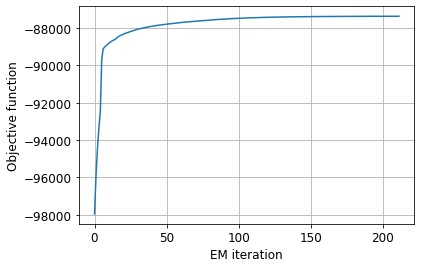

In [10]:
''' objective function'''

plt.rcParams.update({'font.size': 12})
plt.rcParams["figure.figsize"] = (6,4)

plt.plot(llh_all)
plt.grid()
plt.xlabel('EM iteration')
plt.ylabel('Objective function')
plt.show()

In [14]:
plt.rcParams.update({'font.size': 12})
plt.rcParams["figure.figsize"] = (5,5)

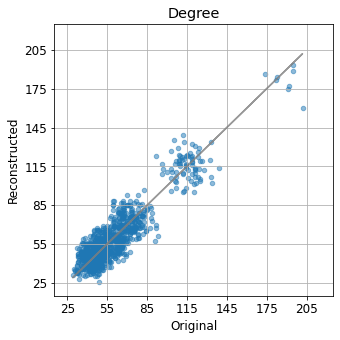

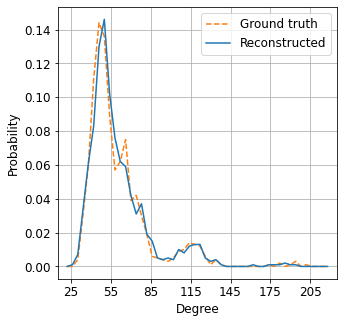

In [15]:
''' degree '''

deg['ab'] = {}
for model in deg['a'].keys():
    deg['ab'][model] = np.concatenate((deg['a'][model], deg['b'][model]))


bin_min = {'a': 100, 'b': 50, 'ab': 20}
bin_max = {'a': 170, 'b': 170, 'ab': 220}
nbins = 50
prop_all = deg

for node_set in ['ab']:
    for model in ['Recon']:
        
        plt.scatter(prop_all[node_set]['Ground truth'], prop_all[node_set][model], s=20, alpha=0.5, label=model)
    plt.plot(prop_all[node_set]['Ground truth'], prop_all[node_set]['Ground truth'], alpha=0.8,\
         color='tab:grey', label='Ground truth')
    plt.xlabel('Original')
    plt.ylabel('Reconstructed')
    plt.grid()
    plt.title('Degree')
    plt.xlim([15,225])
    plt.ylim([15,225])
    plt.xticks(range(25,225,30))
    plt.yticks(range(25,225,30))
    plt.show()
        
for node_set in ['ab']:
    xbin, hist = get_hist_prob(prop_all[node_set]['Ground truth'], bin_min[node_set], bin_max=bin_max[node_set], nbins=nbins)
    plt.plot(xbin, hist, '--', label='Ground truth', color='tab:orange')
    xbin, hist = get_hist_prob(prop_all[node_set]['Recon'], bin_min[node_set], bin_max=bin_max[node_set], nbins=nbins)
    plt.plot(xbin, hist, label='Reconstructed')
    plt.grid()
    plt.xlabel('Degree')
    plt.ylabel('Probability')
    plt.legend()
    plt.xlim([15,225])
    plt.xticks(range(25,225,30))
    plt.show()


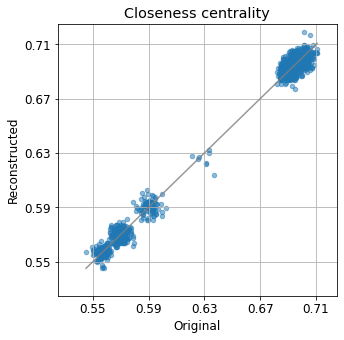

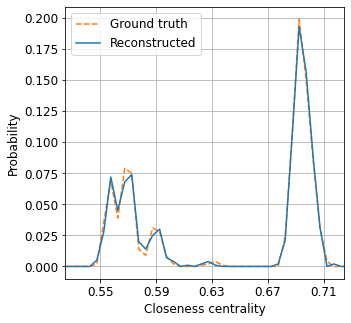

In [16]:
''' closness centrality '''

close['ab'] = {}
for model in close['a'].keys():
    close['ab'][model] = np.concatenate((close['a'][model], close['b'][model]))

bin_min = {'a': 0, 'b': 0, 'ab': 0.5}
bin_max = {'a': 1, 'b': 1, 'ab': 0.75}
nbins = 50
prop_all = close

for node_set in ['ab']:
    for model in ['Recon']:
        
        plt.scatter(prop_all[node_set]['Ground truth'], prop_all[node_set][model], s=20, alpha=0.5, label=model)
    plt.plot(prop_all[node_set]['Ground truth'], prop_all[node_set]['Ground truth'], alpha=0.8,\
         color='tab:grey', label='Ground truth')
    plt.xlabel('Original')
    plt.ylabel('Reconstructed')
    plt.grid()
    plt.title('Closeness centrality')
    plt.xlim([0.525,0.725])
    plt.ylim([0.525,0.725])
    plt.xticks(np.arange(0.55,0.75,0.04))
    plt.yticks(np.arange(0.55,0.75,0.04))
    plt.show()
        
for node_set in ['ab']:
    xbin, hist = get_hist_prob(prop_all[node_set]['Ground truth'], bin_min[node_set], bin_max=bin_max[node_set], nbins=nbins)
    plt.plot(xbin, hist, '--', label='Ground truth', color='tab:orange')
    xbin, hist = get_hist_prob(prop_all[node_set]['Recon'], bin_min[node_set], bin_max=bin_max[node_set], nbins=nbins)
    plt.plot(xbin, hist, label='Reconstructed')
    plt.grid()
    plt.xlabel('Closeness centrality')
    plt.ylabel('Probability')
    plt.legend()
    plt.xlim([0.525,0.725])
    plt.xticks(np.arange(0.55,0.75,0.04))
    plt.show()


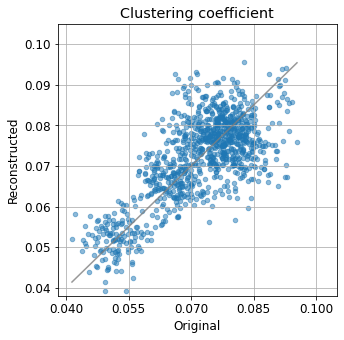

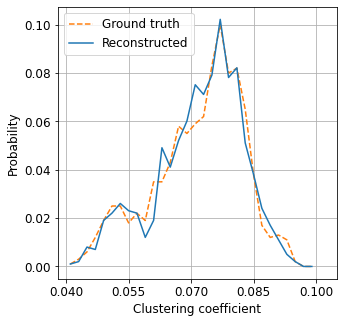

In [17]:
''' clustering coefficients '''

cc['ab'] = {}
for model in cc['a'].keys():
    cc['ab'][model] = np.concatenate((cc['a'][model], cc['b'][model]))

bin_min = {'a': 0, 'b': 0, 'ab': 0.04}
bin_max = {'a': 200, 'b': 600, 'ab': 0.10}
nbins = 30
prop_all = cc

for node_set in ['ab']:
    for model in ['Recon']:
        
        plt.scatter(prop_all[node_set]['Ground truth'], prop_all[node_set][model], s=20, alpha=0.5, label=model)
    plt.plot(prop_all[node_set]['Ground truth'], prop_all[node_set]['Ground truth'], alpha=0.8,\
         color='tab:grey', label='Ground truth')
    plt.xlabel('Original')
    plt.ylabel('Reconstructed')
    plt.grid()
    plt.title('Clustering coefficient')
    plt.xlim([0.038,0.105])
    plt.ylim([0.038,0.105])
    plt.xticks(np.arange(0.04,0.10,0.015))
    plt.xticks(np.arange(0.04,0.10,0.015))
    plt.show()
        
for node_set in ['ab']:
    xbin, hist = get_hist_prob(prop_all[node_set]['Ground truth'], bin_min[node_set], bin_max=bin_max[node_set], nbins=nbins)
    plt.plot(xbin, hist, '--', label='Ground truth', color='tab:orange')
    xbin, hist = get_hist_prob(prop_all[node_set]['Recon'], bin_min[node_set], bin_max=bin_max[node_set], nbins=nbins)
    plt.plot(xbin, hist, label='Reconstructed')
    plt.grid()
    plt.xlabel('Clustering coefficient')
    plt.ylabel('Probability')
    plt.legend()
    plt.xlim([0.038,0.105])
    plt.xticks(np.arange(0.04,0.10,0.015))
    plt.show()
